In [47]:
import numpy as np
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


In [48]:
df = pd.read_csv('vgsales.csv')
print(df)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

# Let's have a look to our data

In [49]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


>> In our data set we have the following information: name of the game, the year of release, genre, platform, bublisher and global sales.

In [13]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


- Let's check if there are any missing values in the dataset


In [16]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

>> For 271 games we don't have information about the year of release and for 58 games the publisher is unknown

# Data Cleaning, Renaming, Converting and Encoding

- Dropping rows of NaN (missing values rows)

In [17]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()
#nan_df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [18]:
df = df.dropna(how='any')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


>> In the original dataset we had 16598 rows, after dropping of the missing values our dataset became shorter and has 16291 rows.

In [19]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


- Converting columns to the right type. "Year"-colomn has type float and we need to convert in into integer.

In [21]:
df['Year']=df['Year'].astype(int)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [23]:
df['Global_Sales'].dtype

dtype('float64')

In [24]:
df['Year'].dtype

dtype('int32')

- Renaming: indicate that sales are in Millions

In [25]:
df = df.rename(columns={'Global_Sales':'Global_Sales_inMM'})
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales_inMM
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


# Exploratory Data Analysis

# > What was the most successful year in term of sales?

In [26]:
all_result= df.groupby('Year').sum()['Global_Sales_inMM'][0:38]

In [27]:
all_result
max_global_sales_value=all_result.max()#value
max_global_sales_value

678.8999999999952

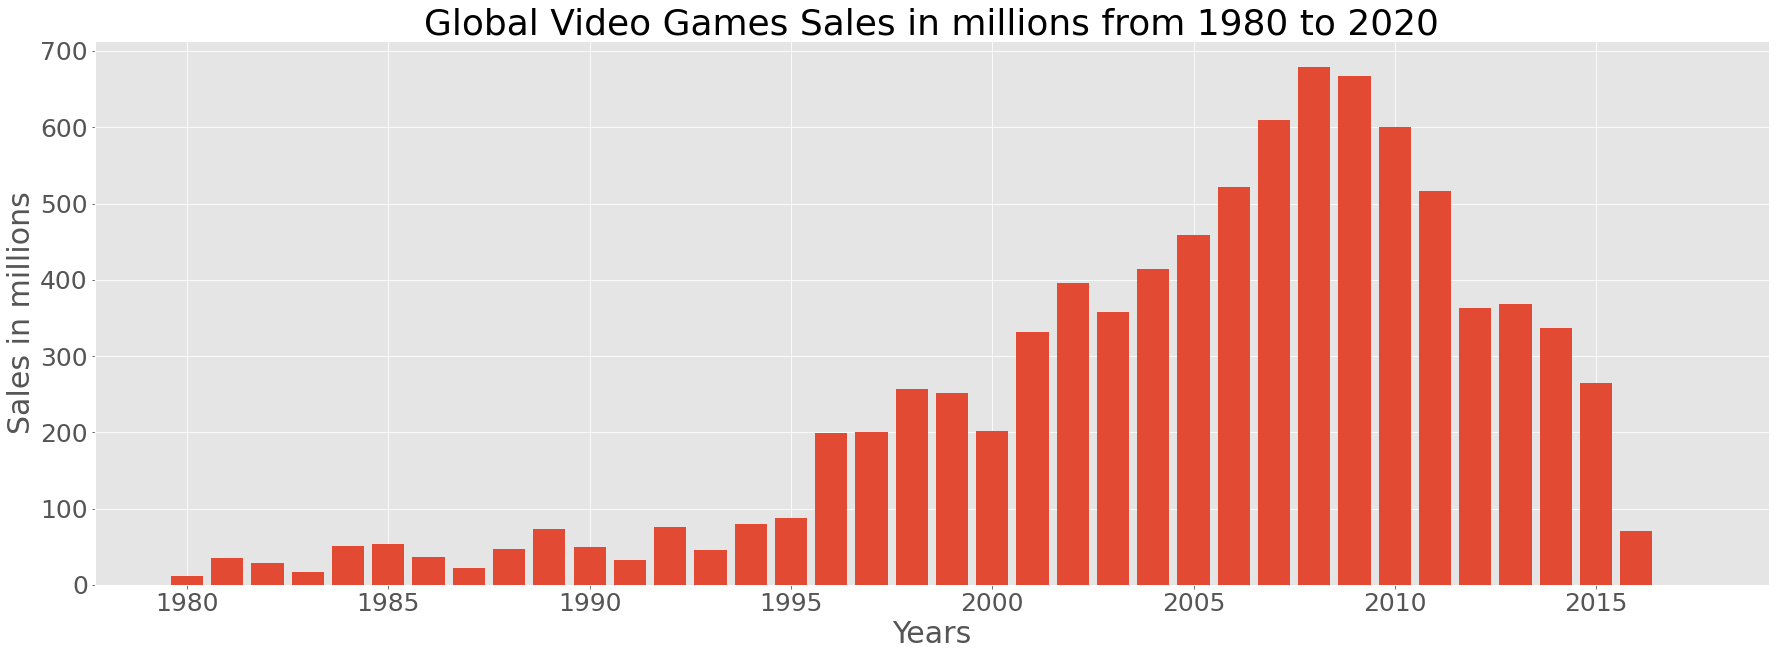

In [37]:
years = range(1980,2018)
plt.bar(years, all_result)
#plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('Sales in millions')
plt.title('Global Video Games Sales in millions from 1980 to 2020')
plt.rcParams['figure.figsize']=(25,10)
plt.rcParams['font.size'] = 25
plt.show()

>> As we can clearly see in the graph, 2008 was the most successful year in term of sales with a value of ~679 Million USD.

# > In which year most games were released?

In [29]:
df['Year'].value_counts()

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

39
1431


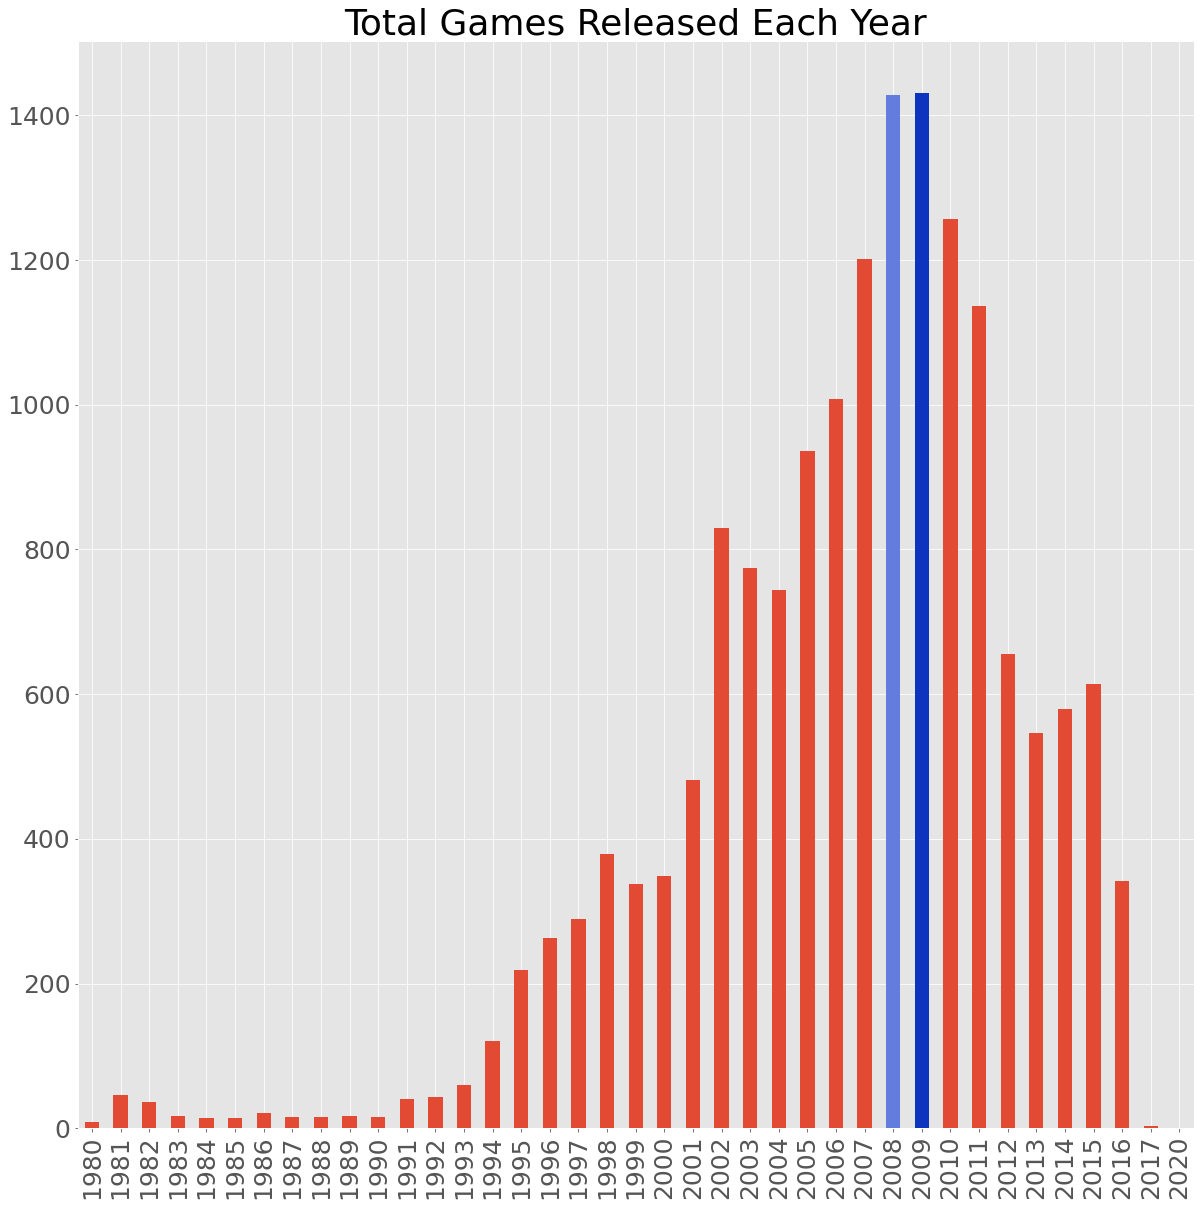

In [35]:
s = df['Year'].value_counts().sort_index()
my_colors = ['#e24a34'] * s.size 
my_colors[s.index.get_loc(2008)] = '#627dde'
my_colors[s.index.get_loc(2009)] = '#0d34bf'
print(len(my_colors))

s.plot(
    kind='bar', 
    color=my_colors,
)

print(df['Year'].value_counts().max())# value 
plt.rcParams['figure.figsize']=(20,20)
plt.rcParams['font.size'] = 25
plt.title("Total Games Released Each Year")
plt.show()


>> We can see that 2009 and 2008 are the years when the most games were realesed. The diference beetween 2008 and 2009 only 3 games: 1428 vs 1421

# > What is the most popular Genre of Video Games?

In [38]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

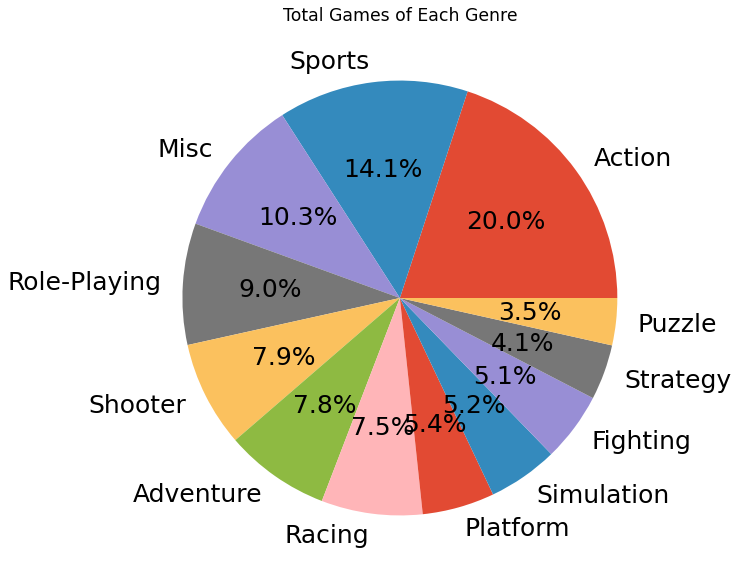

In [39]:
s = df['Genre'].value_counts()
s.name = ''
s.plot.pie(autopct='%1.1f%%')

plt.rcParams['figure.figsize']=(30,10)
plt.rcParams['font.size'] = 12
plt.title("Total Games of Each Genre")
plt.show()


>> When we firstly looked at our data set we thought Sport is the most popular genre. But our analysis revealed Action is the most popular genre. Sport is in second place and the third place belongs  to Misc (Miscellaneous) games.

# > What is the most popular gaming platform?

In [40]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

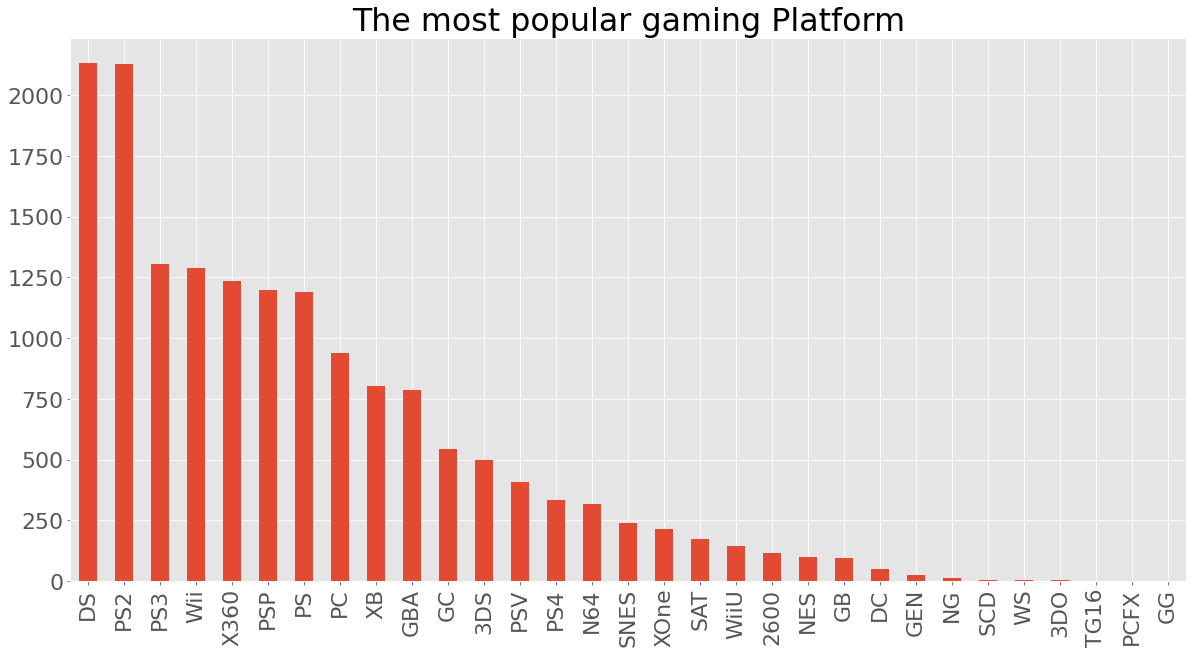

In [43]:
df['Platform'].value_counts().sort_values(ascending = False).plot.bar()
plt.rcParams['figure.figsize']=(25,10)
plt.rcParams['font.size'] = 22
plt.title("The most popular gaming Platform")
plt.show()

>> The most popular platform for video games is DC from Nintendo. The second and the third most popular gaming platforms are PS2 and PS3. The fourth place belongs to Wii or a home video game console from Nintendo as well.


# > As a final part of our analysis, we want to know which publisher released and developed most of the video games between 1980 and 2020.

In [44]:
number_df = df.groupby('Publisher')[['Name']].count().sort_values('Name', ascending = False).head(50)
number_publischer = number_df.rename(columns = {'Name' : 'Number'}, inplace = False)
number_publischer


,Number
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
THQ,712
Nintendo,696
Sony Computer Entertainment,682
Sega,632


Text(0.5, 1.0, 'Top Publishers of Games')

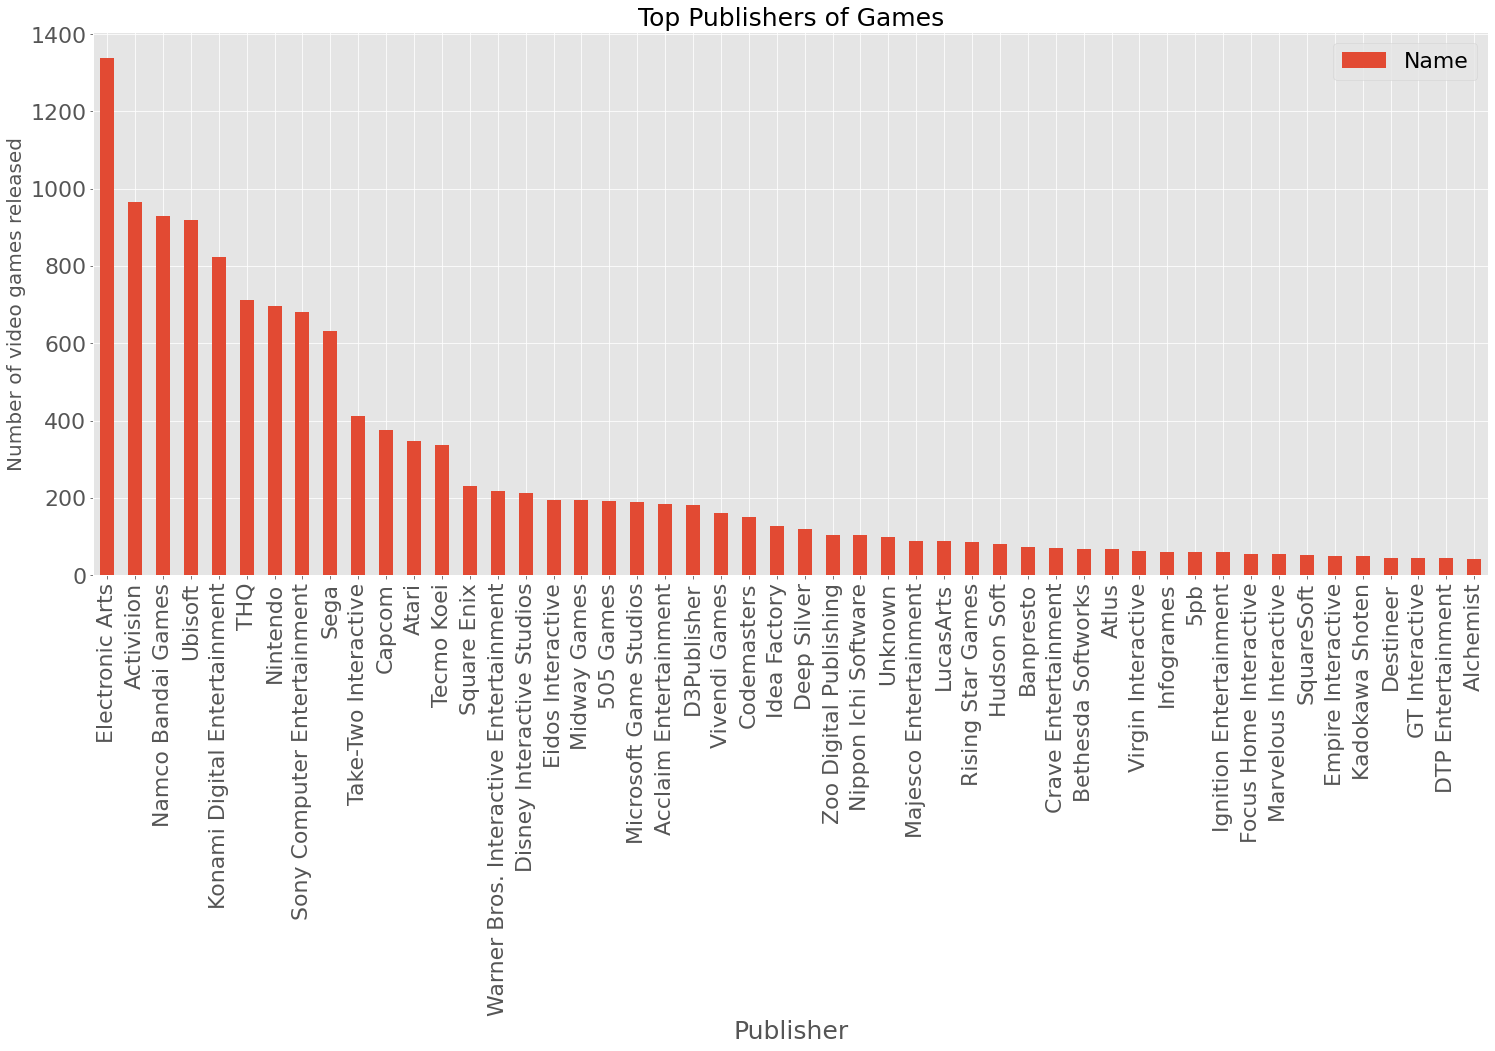

In [46]:
number_df.plot(kind = 'bar', figsize = (25, 10))
plt.xlabel('Publisher', fontsize = 25)
plt.ylabel('Number of video games released', fontsize = 20)
plt.title('Top Publishers of Games', fontsize = 25)